Target x(tend) = x(1): 0.5
Initial x0 guess:  3
Prop. constant: 1

Solution obtained! x0 = 0.7073833288749708
Final error value: -9.774569902654129e-05
Iterations used: 31


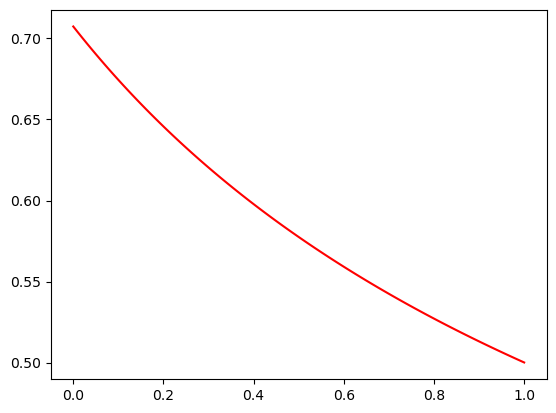

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for the solution to dx/dt, x(t):
def x_func(t, x0):
    # x = 1/(sqrt())
    x = 1/(np.sqrt(2*t + x0**(-2)))
    return x

# Define range of time values
t0, tend = 0, 1
# Define target x value at tend
xd = 0.5

# Initialize a list for storing x0 values and pick initial guess
x0 = []
x0.append(3)
# Add proportionality constant for control, tolerance, and max iterations
K = 1
tol = 0.0001
err = []
err.append(10)

max_iters = 100000
iters = 0

print(f'Target x(tend) = x({tend}): {xd}')
print("Initial x0 guess: ", x0[0])
print(f'Prop. constant: {K}')

while abs(err[-1]) > tol:
    # Use x0 to solve for x(tend)
    x_tend = x_func(tend, x0[-1])

    # Error > 0 if x(tend) < xd, want to increase x0
    err.append(xd - x_tend)
    iters += 1
    if iters >= max_iters:
        print(f'Max iterations reached! Error: {err[-1]}')
        print(f'Final x0: {x0[-1]}')
        print(err)
        print(x0)
        break
    if abs(err[-1]) < tol:
        print(f'\nSolution obtained! x0 = {x0[-1]}')
        print(f'Final error value: {err[-1]}')
        print(f'Iterations used: {iters}')
        break
    # Use prop. constant and last error for next x0 value
    x0.append(x0[-1] + K*err[-1])


t_plot = np.linspace(t0,tend,100)
x_plot = x_func(t_plot, x0[-1])
plt.figure()
plt.plot(t_plot, x_plot, color='red')
plt.show()



    
